In [256]:
from astropy import units as u
from astropy import time
import numpy as np
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D
import matplotlib.pyplot as plt
%matplotlib notebook

In [257]:
# https://docs.poliastro.space/en/latest/autoapi/poliastro/twobody/orbit/index.html
circularorbit = Orbit.circular(Earth, 6793137 * u.meter, 0*u.deg, 0*u.deg, 0*u.deg)#, time.Time("2006-01-19", scale='utc'))

In [258]:
print(circularorbit)
coord = circularorbit.sample(1000)
# .sample from poliastro documentation, divides a "single loop" around the orbit into specified numbers.
print(type(coord.x))
print(coord[0])
# print(coord[0].x + 1*u.km)
# print(coord[0].y)
# print(coord[0].z)

13171 x 13171 km x 0.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)
<class 'astropy.units.quantity.Quantity'>
(13171.2736, 0., 0.) km


In [259]:

plotter = OrbitPlotter3D()
plotter.set_attractor(Earth)
plotter.plot(circularorbit)
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

In [260]:
# print(xval.shape)
# print(coord.shape)
# newx = xval*u.km + coord.x
# newy = xval*u.km + coord.y
# newz = xval*u.km + coord.z
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')  
# ax.set_aspect('auto')
# ax.plot3D(coord.x,coord.y,coord.z, 'grey')

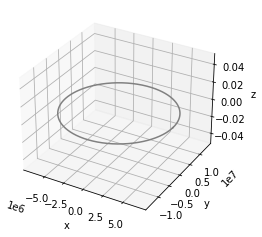

In [261]:
# This makes the plots appear inside the notebook
get_ipython().run_line_magic('matplotlib', 'inline')
from scipy.integrate import odeint

miu = 3.986*10**14
a = 6793137
n = np.sqrt(miu/(a**3))

# Define a function which calculates the derivative
def dU_dx(U, x):
    return [U[1],   3*(n**2)*U[0]+2*n*U[3],   U[3],   -2*n*U[1],     U[5],      -(n**2)*U[4]]

U0 = [a,0,0,-2*n*a,0,0]
# xs = np.linspace(0,15000,1000000)
xs = np.linspace(0,5580,1000)
# given assumption of one orbital period of 93 min = 5580 seconds

Us = odeint(dU_dx, U0, xs)
xval = Us[:,0] #first column x-coordinates
yval = Us[:,2]
zval = Us[:,4]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')  
ax.set_aspect('auto')
ax.plot3D(xval,yval,zval, 'grey')


In [262]:
anglestep = np.linspace(0, 2*np.pi, 1000)

def rot(x,y,theta):
    rotationmat = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    return np.matmul(rotationmat, np.array([[x],[y]]))
#return np.matmul(rotationmat, np.array([[x.value],[y.value]]))
newz = np.copy(coord.z.value)
newx = np.copy(coord.x.value)
newy = np.copy(coord.y.value)

for i in range(1000):
    rotated = rot(xval[i],yval[i],anglestep[i])
    newx[i] = (newx[i] + rotated[0])
    newy[i] = (newy[i] + rotated[1])
    
       
newx = newx*u.km    
newy = newy*u.km 
newz = newz*u.km

In [265]:

%matplotlib notebook


<IPython.core.display.Javascript object>


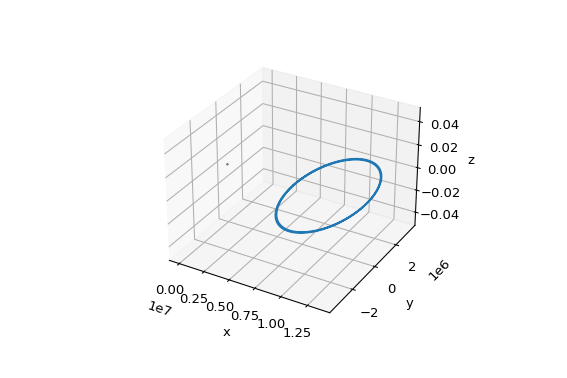

In [267]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')  
ax.set_aspect('auto')
ax.plot3D(coord.x,coord.y,coord.z, 'grey')
ax.plot3D(newx,newy,newz)

In [264]:
print(coord[0])
print(newx[0])

(13171.2736, 0., 0.) km
6806308.2736 km
